# Data Intelligence Exam

Jonas Skjødt | skjo@itu.dk | Date: 2025-26-05  

## Introduction

This report analyzes the census-1994.csv dataset. As per the description of the dataset: "Census data from USA gathered in 1994. Contains demographic information about US citizens. These values are self-reported by the participating citizens." Although the values are self-reported, for this report it is assumed the values are true.

The report goes through the technologies used to understand the data, followed by sections which explore the data set to see what it holds. The report then adds questions to test the data set with, followed by preprocessing its data. Once preprocessed, the data set is then examined by looking at data relationships, analyzed through these data relationships, and then followed by a conclusion.

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

We import the libraries we need to extract data from the csv. We use the Pandas library for data manipulation, and Seaborn and MapPlotLib for visual presentation. From sklearn.linear_model we'll import LinearRegression for regression plots.

# Exploration
In the exploration phase, we'll superficially look through the data set. We'll be using data manipulation such as df.columns.tolist() to look at the column names, df.head() to see the five first values of each column, value_counts() which returns the count of unique values in a column, and df.describe() to summarize the central tendencies of a column.

As a start, let's make sure the columns match the handed out description of what the data set entails.

In [68]:
df = pd.read_csv('census-1994.csv')
df.columns.tolist()

['age',
 'workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income_bracket']

The correct columns are all there, let's continue the exploration. We'll use head() to see the first five values of each column.

In [69]:
df.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [70]:
educationColumn = df['education'].value_counts()
print(educationColumn)

workclassColumn = df['workclass'].value_counts()
print('\n', workclassColumn)

education
HS-grad         10199
Some-college     7044
Bachelors        5160
Masters          1669
Assoc-voc        1347
11th             1124
?                1043
Assoc-acdm       1031
10th              914
7th-8th           625
Prof-school       560
9th               498
12th              415
Doctorate         404
5th-6th           320
1st-4th           158
Preschool          50
Name: count, dtype: int64

 workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


Most of the individuals in this dataset have a high school education level, or some college. The workclass shows most work in private companies.

In [71]:
count1 = df['capital_gain'].describe()
print(count1)

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64


In the describe(), we notice values as "count" (how many unique values there are), "mean" (the mean of all values), std (standard deviation, where it shows a massive jump from its mean - this shows the presence of potential outliers) and a max of 99999.
There seems to be some values marked as " ?" in different columns. The question mark is outlined in multiple other columns, such as " education" and " workclass". We'll take care of the missing values in the preproccessing later. Let's take a quick look at the capital_gain column visually, the max number stands out. We'll use Seaborn here to visualize the distribution through a histplot.

Text(0.5, 1.0, 'Non Zero Capital Gains')

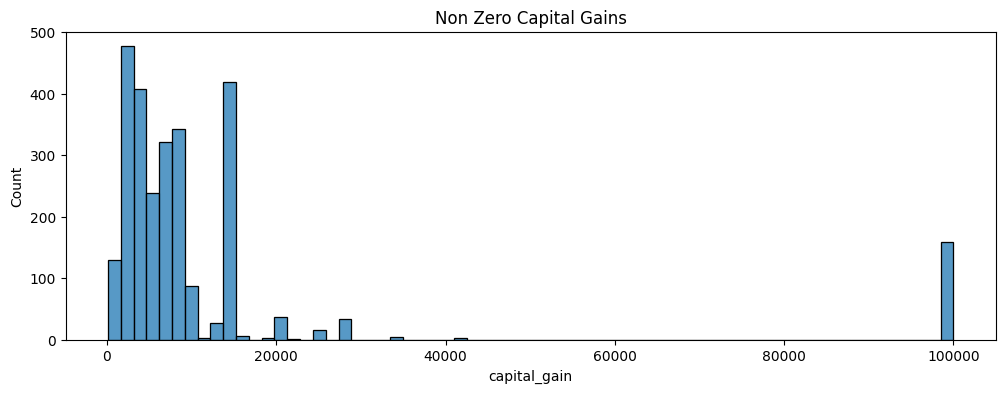

In [72]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['capital_gain'] > 0] ['capital_gain'])
plt.title('Non Zero Capital Gains')

In the data, 99999 shows as the max value - which could indicate that thats the capped max value. There is also the possibility that the legacy systems of 1994 had fixed numeric inputs. However, for this assignment, let's assume it was capped for a reason, perhaps as a display for anonymonity for the very wealthy. Let's make a test to see how many it has.

In [73]:
print(f"Amount of 99999: {(df['capital_gain'] == 99999).sum()}")

Amount of 99999: 159


There are 159 values at the number 99999, it has less of a chance to be a regular outlier then (more than a hundred have the number applied)

Let's explore further, do we see the same trends in the column capital_loss?

In [74]:
print(df['capital_loss'].describe())

# Check if 99999 is with what we expect
top = df[df['capital_gain'] == 99999]
print(f"Percentage top: {len(top)/len(df):.2%}")

# Compare
print(f"Capital loss max: {df['capital_loss'].max()}")

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64
Percentage top: 0.49%
Capital loss max: 4356


99999 does not show in the capital_loss column. Although the number 99999 looks like an outlier, there is a chance that bias could be introduced to the dataset if the value is removed. The existence of wealthy high earners seems to be represented by the capped 99999 number.

Otherwise there doesnt seem to be any suspicious numbers in the capital_loss column, as its max is set at 4356.

Continuing on in the dataset, let's explore the gender column.

In [75]:
df['gender'].value_counts()

gender
Male      20741
Female    10262
?          1558
Name: count, dtype: int64

The gender has an overreprecentation of Male compared to female, and some genders are marked as "?".

In [76]:
df.groupby('gender')['income_bracket'].value_counts(normalize=True)

gender  income_bracket
?       <=50K             0.789474
        >50K              0.210526
Female  <=50K             0.890859
        >50K              0.109141
Male    <=50K             0.691770
        >50K              0.308230
Name: proportion, dtype: float64

The data shows the gender "Female" usually earns less than the gender "Male". 30.8% of the "Male" gender earns above 50k where "Female" only has 10.9% earning above 50k. Let's explore the income_bracket column further.

In [77]:
# use value_counts to get the percentage of the income_bracket column
df['income_bracket'].value_counts(normalize=True)

income_bracket
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

The income_bracket indicates that over 75% of the data set individuals have an income below 50k. Perhaps its because of lack of skill completed through education. 

In [78]:
# crosstab to see the relationship between education and income bracket
pd.crosstab(df['education'], df['income_bracket'], normalize='index')

income_bracket,<=50K,>50K
education,,
10th,0.934354,0.065646
11th,0.947509,0.052491
12th,0.925301,0.074699
1st-4th,0.962025,0.037975
5th-6th,0.950000,0.050000
7th-8th,0.939200,0.060800
9th,0.945783,0.054217
?,0.754554,0.245446
Assoc-acdm,0.752667,0.247333


There seems to be a correlation between education and the amount of income. A doctorate has a higher chance of earning above 50k, compared to someone with a lower education, like 9th grade where 94.5% of individuals earn below 50k.

In [79]:
df.groupby('income_bracket')['age'].mean()

income_bracket
<=50K    36.783738
>50K     44.249841
Name: age, dtype: float64

Making a groupby with income_bracket and age shows there's also a tendency where those who are below 50k are usually younger than those who earn above 50k who are older. With a mean of 44, the data shows older individuals usually have more income. Let's continue exploring the race column.

In [80]:
df['race'].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

The dataset seems to overrepresent the race "White" compared to the rest of the races. Knowing the history of USA and its racial tension, let's see what the educational level of the races "White" and "Black" are. 

In [81]:
# groupby race and education, then calculate the percentage of each education
result = df.groupby('race')['education'].value_counts(normalize=True)
# only show the top 4 education levels
result = result.loc[:, [' Bachelors', ' HS-grad', ' Some-college', ' Masters']]
# print only white and black
print(result.loc[[' White', ' Black']])


race   education   
White  Bachelors       0.162029
       HS-grad         0.311296
       Some-college    0.215883
       Masters         0.053530
Black  Bachelors       0.102753
       HS-grad         0.362356
       Some-college    0.227273
       Masters         0.026569
Name: proportion, dtype: float64


The data shows how the race "Black" overall has a lower educational level than the race "White". For instance, more of the race "White" has a Bachelor than the race "Black".

In [82]:
# groupby to see the relationship between occupation and income bracket 
df.groupby('race')['income_bracket'].value_counts(normalize=True)

race                income_bracket
Amer-Indian-Eskimo  <=50K             0.884244
                    >50K              0.115756
Asian-Pac-Islander  <=50K             0.734360
                    >50K              0.265640
Black               <=50K             0.876120
                    >50K              0.123880
Other               <=50K             0.907749
                    >50K              0.092251
White               <=50K             0.744140
                    >50K              0.255860
Name: proportion, dtype: float64

The data set shows the amount of individuals earning above 50k is higher if you're a certain race. The races "White" and "Asian-Pac-Islander" both earn above ca 15% more than races such as "Black" or "Amer-Indian-Eskimo". Let's explore more and take a look at the races' occupations.

In [83]:
# define the variable then use groupby to get the top 3 occupations
top_occupations = (
    df.groupby('race')['occupation']
    .value_counts(normalize=True)
    .groupby('race')  # Group again by race so we can take the top 3 of each race
    .head(3)          # Take top 3 per race
    .sort_index(level='race')  # Sort by race for readability
)

print(top_occupations)

race                occupation       
Amer-Indian-Eskimo  Craft-repair         0.141479
                    Other-service        0.106109
                    Prof-specialty       0.106109
Asian-Pac-Islander  Adm-clerical         0.133782
                    Exec-managerial      0.129933
                    Prof-specialty       0.179018
Black               Adm-clerical         0.156850
                    Machine-op-inspct    0.087708
                    Other-service        0.182778
Other               Machine-op-inspct    0.143911
                    Other-service        0.147601
                    Prof-specialty       0.114391
White               Craft-repair         0.132801
                    Exec-managerial      0.131076
                    Prof-specialty       0.131255
Name: proportion, dtype: float64


In [84]:
# groupby to see the relationship between occupation and income bracket 
top_earning_occupations = (
    df.groupby('occupation')['income_bracket']
    .apply(lambda x: (x == ' >50K').mean() * 100) # we use apply to calculate the percentage of >50K
    .sort_values(ascending=False)                 # Sort by highest % >50K
    .head(5)                                      # take only the top 5 results
    .round(1)                                     # Round to 1 decimal place
)

print("Top 5 highest earning occupations (% in >50K):")
print(top_earning_occupations)

Top 5 highest earning occupations (% in >50K):
occupation
Exec-managerial    48.4
Prof-specialty     44.9
Protective-serv    32.5
Tech-support       30.5
Sales              26.9
Name: income_bracket, dtype: float64


Taking a look at the top 5 highest earning occupations, we can see the race "White" and "Asian-Pac-Islander" usually have higher income jobs than the races "Black", "Amer-Indian-Eskimo" and "Other".

The rest of the data set seems straight forward with nothing unusual, indicating the status of relationship and marital_status.

# Research questions and hypothesis
On the basis of the data exploration, these are the research questions this report will continue with.

How do the highest capital earners correlate with executive occupations or trading (asset sales)?

Is there a systemic bias based around race or gender, showing an imbalance in income and education?

### Preprocessing
We'll start by cleaning up the dataset to examine the data further. We'll try going by Hadley Wicham's tidy data principles (ref. 1). Right now, the data set is already tidy in structure and only a small clean up is needed. We standardize by stripping whitespace from objects to and clarify values.

In [85]:
# define the columns which has the missing values
cols_with_missing = ['education', 'workclass', 'occupation', 'gender', 'native_country']
# replace '?' with 'unknown'
df[cols_with_missing] = df[cols_with_missing].replace(' ?', 'Unknown')

# verify if the replacement worked
print(df.isin([' ?']).sum())

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64


" ?" is replaced with "Unknown" to indicate a better wording for the value. The reason why the values were inserted by users as a question mark was most likely because they didn't answer it or the values didn't match the user's experiences. In either case, let's keep these values as unknowns to not lose any data.

In [86]:
# Clean string-type columns (including 'object' and 'category')
str_cols = df.select_dtypes(include=['object', 'category']).columns

# strip whitespace and replace ' ?' with 'unknown' if there were any
df[str_cols] = df[str_cols].apply(
    lambda x: x.str.strip() if x.dtype == 'object' else x.replace(' ?', 'Unknown').str.strip()
)

# Verify cleaning
for col in str_cols:
    weird_spaces = df[col].astype(str).str.contains(r'^\s|\s$').sum()
    print(f"{col}: {weird_spaces} leading/trailing spaces (should be 0)")

workclass: 0 leading/trailing spaces (should be 0)
education: 0 leading/trailing spaces (should be 0)
marital_status: 0 leading/trailing spaces (should be 0)
occupation: 0 leading/trailing spaces (should be 0)
relationship: 0 leading/trailing spaces (should be 0)
race: 0 leading/trailing spaces (should be 0)
gender: 0 leading/trailing spaces (should be 0)
native_country: 0 leading/trailing spaces (should be 0)
income_bracket: 0 leading/trailing spaces (should be 0)


All the columns had a trailing space. We stripped each object of its whitespace and made sure again to replace the question mark with "Unknown".

Afterwards, we make a for loop to go through the columns to look for any missed whitespaces we haven't taken care of. The print shows us all whitespaces are taken care of. Now that we've preprocessed the data, we can move on to the Analysis.

# Analysis

In this section, we'll look at the relationships between different variables in the data. We'll begin by looking at the relationships to the first question: How do the highest capital earners correlate with executive occupations or trading (asset sales)?

To understand the relationships, we'll use data manipulation from the Pandas library. Functions like groupby() where we can group different columns together to analyze the data within each group, unstack(), crosstab(), use percentage calculations (since there are a larger amount from the race "white" who's represented in the dataset), and use value_counts() to count unique values (ref. 2).

In the start of the 90s in U.S., high earning capital gain is dominated by Prof-school and other high end educations. These were typically lawyers, doctors, professors, or other highly educated societal members. These individuals usually have insights, either from education or social circles, and enough money to invest. This tendency is also shown in the number of individuals working with sales who invest and lead to greater asset earning returns.

In [101]:
# filter for high capital gainers
high_gainers = df[df['capital_gain'] > 50000]

# group by occupation and count
occupation_counts = high_gainers['occupation'].value_counts().reset_index()
occupation_counts.columns = ['occupation', 'count']
# sort by count
best_occupation = occupation_counts.sort_values(by='count', ascending=False).head(10)

print(best_occupation)

          occupation  count
0     Prof-specialty     67
1    Exec-managerial     42
2              Sales     25
3       Craft-repair      8
4       Adm-clerical      6
5            Unknown      4
6      Other-service      2
7  Machine-op-inspct      1
8   Transport-moving      1
9    Protective-serv      1


The highest earning individuals are already mostly in high paying jobs. Prof-speciality (specialised in the likes of medicin, law, etc.) are the highest asset earners. Those who do sales as their occupation are lower than the ones that Exec-managerial and Prof-specialty, but still in the top three.

In [102]:
# by workclass
high_gainers = df[df['capital_gain'] > 50000]
print(high_gainers['workclass'].value_counts())

#by age, where median shows the middle value
print('\n', high_gainers.groupby('occupation')['age'].median())

workclass
Private             82
Self-emp-inc        36
Self-emp-not-inc    29
Local-gov            6
Unknown              4
Federal-gov          1
State-gov            1
Name: count, dtype: int64

 occupation
Adm-clerical         44.0
Craft-repair         52.5
Exec-managerial      48.0
Handlers-cleaners    42.0
Machine-op-inspct    33.0
Other-service        45.5
Prof-specialty       46.0
Protective-serv      21.0
Sales                46.0
Tech-support         48.0
Transport-moving     30.0
Unknown              59.5
Name: age, dtype: float64


Looking at the workclass data of the high assert earners, it further shows how Private is dominating, and self employed is following closely. "Private" suggesting well earning jobs at corporations. Concerning their age, its evident the majority of highest earners are in their fourties or above in age.

In [103]:
# filter for high capital gainers
high_gainers = df[df['capital_gain'] > 50000]

# top by education
edu_occuption = high_gainers.groupby(['occupation', 'education']).size().unstack()

print(edu_occuption.loc[['Prof-specialty', 'Exec-managerial', 'Sales']])

education        10th  9th  Assoc-acdm  Assoc-voc  Bachelors  Doctorate  \
occupation                                                                
Prof-specialty    NaN  NaN         1.0        1.0        8.0        8.0   
Exec-managerial   NaN  NaN         NaN        NaN       14.0        3.0   
Sales             NaN  NaN         NaN        NaN       11.0        1.0   

education        HS-grad  Masters  Prof-school  Some-college  Unknown  
occupation                                                             
Prof-specialty       2.0      5.0         41.0           NaN      1.0  
Exec-managerial      6.0     10.0          5.0           3.0      1.0  
Sales                5.0      3.0          NaN           5.0      NaN  


As the data shows, the people with high asset income have varying degrees at the higher end of education. The Prof-specialty all have advanced degrees (most have the education level of Prof-school, indicating lawyers, doctors, etc..), while this educational level becomes a balanced mix as we go to Exec-managerial and sales positions.

In [104]:
# using income_bracket to make sure we are looking at actual high earners
cross_tab = pd.crosstab(high_gainers['income_bracket'], high_gainers['occupation'])
print(cross_tab)

occupation      Adm-clerical  Craft-repair  Exec-managerial  \
income_bracket                                                
>50K                       6             8               42   

occupation      Handlers-cleaners  Machine-op-inspct  Other-service  \
income_bracket                                                        
>50K                            1                  1              2   

occupation      Prof-specialty  Protective-serv  Sales  Tech-support  \
income_bracket                                                         
>50K                        67                1     25             1   

occupation      Transport-moving  Unknown  
income_bracket                             
>50K                           1        4  


We'll now focus on the second question, "Is there a systemic bias based around race or gender, showing an imbalance in income and education?" We'll start by taking a look at the income levels of both gender and race.

In [105]:
# gender
gender_income = df.groupby(['gender', 'income_bracket']).size().unstack()
gender_income_pct = gender_income.div(gender_income.sum(axis=1), axis=0) * 100
print("Income by Gender (%):")
print(gender_income_pct.round(1))

# race
race_income = df.groupby(['race', 'income_bracket']).size().unstack()
race_income_pct = race_income.div(race_income.sum(axis=1), axis=0) * 100
print("\nIncome by Race (%):")
print(race_income_pct.round(1))

Income by Gender (%):
income_bracket  <=50K  >50K
gender                     
Female           89.1  10.9
Male             69.2  30.8
Unknown          78.9  21.1

Income by Race (%):
income_bracket      <=50K  >50K
race                           
Amer-Indian-Eskimo   88.4  11.6
Asian-Pac-Islander   73.4  26.6
Black                87.6  12.4
Other                90.8   9.2
White                74.4  25.6


The data shows how males are almost three times more likely to earn > 50k a year than females, showing how females earn 10.9% and males 30.8% above 50 k.

Notice also the races "white" and "asian" are earning almost trible the amount above 50k, compared to that of "black" and "Amer-Indian-Eskimo". Visualizing this makes it even more apparent.

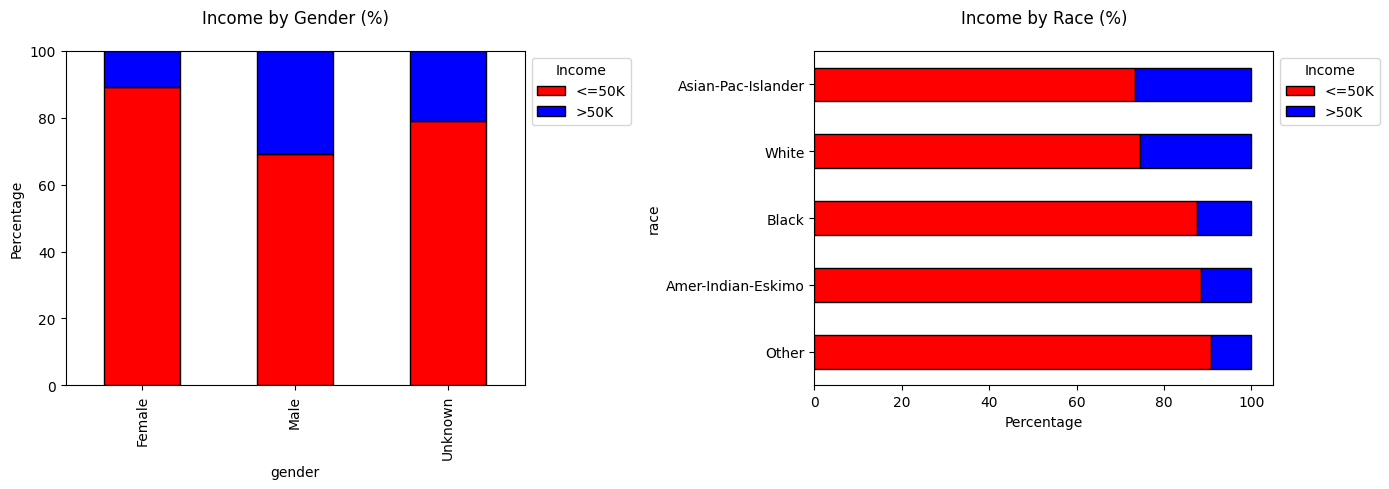

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gender (percentage)
gender_income_pct.plot(kind='bar', stacked=True, ax=ax1, 
                      color=['red','blue'], edgecolor='black')
ax1.set_title('Income by Gender (%)', pad=20)
ax1.set_ylabel('Percentage')
ax1.set_ylim(0, 100)
ax1.legend(title='Income', bbox_to_anchor=(1, 1))

# Race (percentage)
race_income_pct.sort_values('>50K').plot(kind='barh', stacked=True, ax=ax2, 
                                        color=['red','blue'], edgecolor='black')
ax2.set_title('Income by Race (%)', pad=20)
ax2.set_xlabel('Percentage')
ax2.legend(title='Income', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Visualizing the data makes it a bit more clear. It shows how women generally earn less than men. Furthermore, the data also shows the gap between races, as white/asians generally earn more than Amer-Indian-Eskimo, black and others. Like real-world surveys have shown (ref 4), specific races like "White" tend to have a higher median income than "Black". In the examination of the data set, we saw a tendency where higher education individuals earned more. Visualizing this furthers the tendency of how there's a racial gap. 

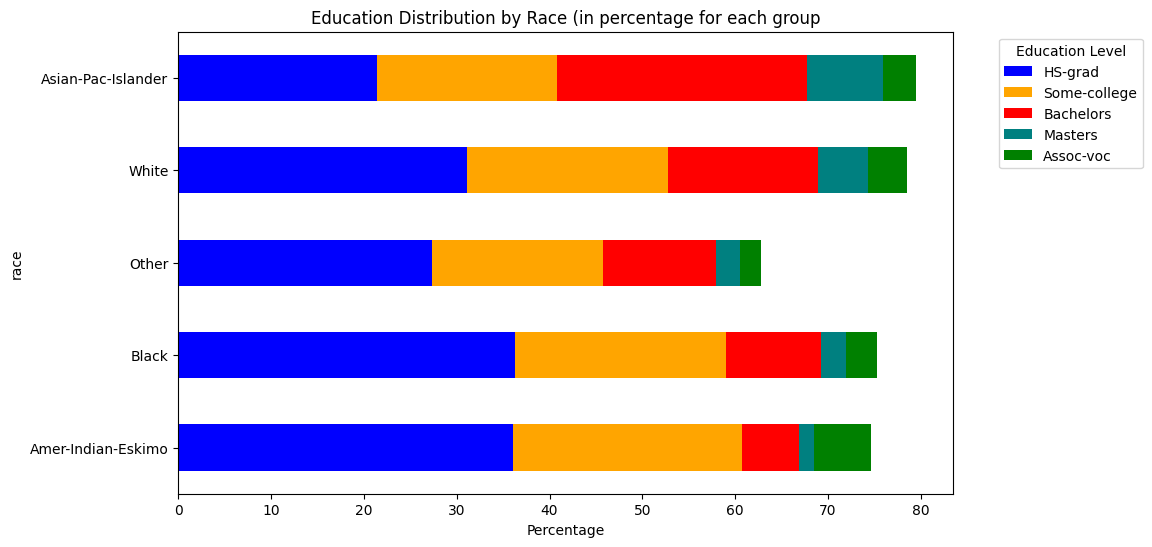

In [107]:
education_by_race = df.groupby(['race', 'education']).size().unstack()

# Calculate percentages within each race
education_pct = education_by_race.div(education_by_race.sum(axis=1), axis=0) * 100

# Plot top 5 education levels for clarity
top_educations = ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc']
education_pct[top_educations].sort_values('Bachelors', ascending=True).plot(
    kind='barh', 
    stacked=True,
    figsize=(10, 6),
    color=['blue', 'orange', 'red', 'teal', 'green']
)

plt.title('Education Distribution by Race (in percentage for each group')
plt.xlabel('Percentage')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1))
plt.show()

Looking at the relationship between education and race, we find "Black", "Amer-India-Eskimo" and "Other" to have low education, where "White" and "Asian" tend comparitively have higher education. This is another indication of the racial imbalance in 1994 USA, further showcased by real world data. As the website bls.gov details "... 64 percent of the white high school graduates entered college, only about half of black and Hispanic youth were enrolled." (ref. 5). This shows the overall trend of races and their choice of education in 1994 usa. The cultivation of education and the skill it brings with it gives a higher chance of high paying jobs, but how many hours per week do each race work?

In [108]:
hours_by_race = df.groupby('race')['hours_per_week'].mean().sort_values(ascending=False)
print(hours_by_race)

race
White                 40.689100
Asian-Pac-Islander    40.127045
Amer-Indian-Eskimo    40.048232
Other                 39.468635
Black                 38.422855
Name: hours_per_week, dtype: float64


The dataset details that the race, "White", works more than other races - again indicating being "White" had more work oppeturnities. in 1994 USA, real world data shows only 5.3% of "White" were unemployed, compared to "Black" having 11.5% unemployed (ref. 6). This is further shown by how looking at the dataset for hours_per_work and looking at it compared to race and income.

In [110]:
hours_race_income = df.groupby(['race', 'income_bracket'])['hours_per_week'].mean().unstack()
print(hours_race_income.sort_values('<=50K', ascending=False).round(1))

income_bracket      <=50K  >50K
race                           
Amer-Indian-Eskimo   39.4  44.9
White                39.0  45.6
Other                38.9  44.9
Asian-Pac-Islander   38.4  44.8
Black                37.6  44.4


The data indicates that the race "Black" works less than "White" or "Amer-Indian-Eskimo" when earning below 50k. Further strengthening the idea that the race "black" may have less work oppertunities. Looking at gender, let's see if there are any systemic imbalances there as well.

In [111]:
# gender occupation
occupation_gender = df.groupby(['gender', 'occupation']).size().unstack()
print(occupation_gender[['Exec-managerial', 'Prof-specialty', 'Sales']], "\n")

# gender hours of work
gender_hours = df.groupby(['gender', 'income_bracket'])['hours_per_week'].mean().unstack()
print(gender_hours)

occupation  Exec-managerial  Prof-specialty   Sales
gender                                             
Female               1108.0          1455.0  1187.0
Male                 2773.0          2496.0  2281.0
Unknown               185.0           189.0   182.0 

income_bracket      <=50K       >50K
gender                              
Female          35.913804  40.466964
Male            40.667340  46.334428
Unknown         39.277236  45.777439


For gender, the difference is also shown between men and women. Men usually hold higher paying occupations and higher paying jobs than women. As seen by the dataset, men outnumber women almost 2 to 1 in the highest paying jobs. But as seen by the income bracket vs hour_per_week spent working, men work almost 6 hours more than women on average. Cross referencing with real world data, we can see a trend here as well. Women tend to earn less than men overall. Cross referencing real world data showed there was a 72% earning difference at the time (ref. 7). 

Not only does there seem to be a an imbalance between the races, but also the genders where men generally earn more. This seems to prove statistically that there is a "double disadvantage" of being a black woman in 1994, USA. Visualizing the income by race and gender shows this imbalance.

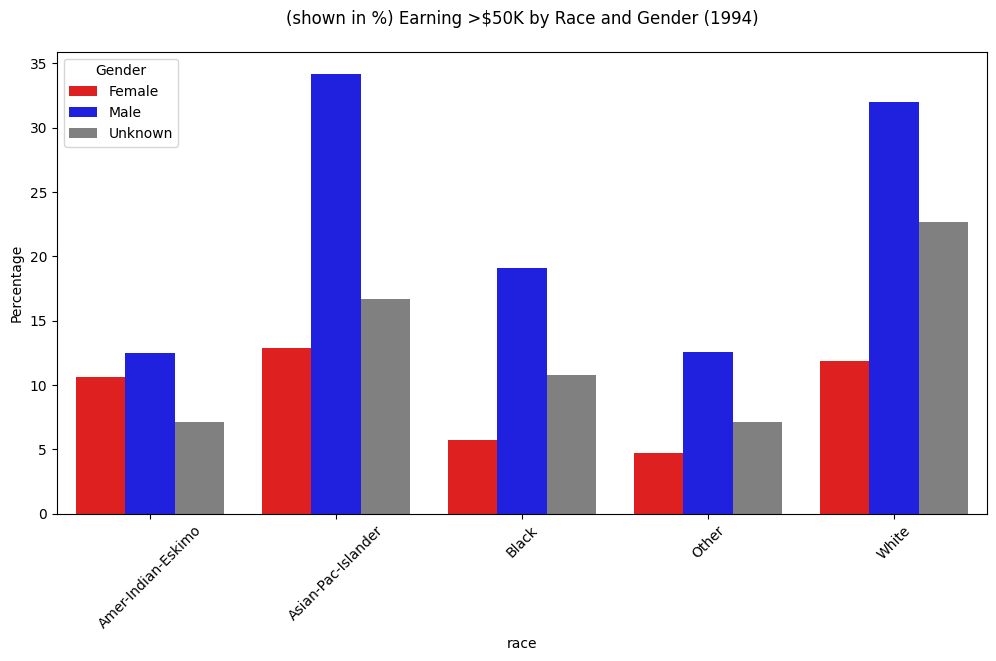

In [112]:
# Filter for high earners and group by race + gender
high_earners = df[df['income_bracket'] == '>50K']
gender_race_counts = high_earners.groupby(['race', 'gender']).size().unstack() # unstack them becase we want to see the counts for each

# Convert counts to percentages
gender_race_pct = gender_race_counts.div(df.groupby(['race', 'gender']).size().unstack()) * 100

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=gender_race_pct.reset_index().melt(id_vars='race'), 
    x='race', 
    y='value', 
    hue='gender',
    palette={'Male': 'blue', 'Female': 'red', 'Unknown': 'gray'}
)
plt.title('(shown in %) Earning >$50K by Race and Gender (1994)', pad=20)
plt.ylabel('Percentage')
plt.xticks(rotation=45) # rotate the labels for better readability
plt.legend(title='Gender')
plt.show()

Using Seaborn, we're able to visualize the "female" gender is earning a lot less income compared to "male" in all races. We define those who earn over 50k from the income_bracket, and group the genders and race together in a groupby, convert it to percentages (because the race "white" is over-representated in the dataset), and then make a barplot to showcase it.

In particular, the plot shows that if you are a black woman, you have a high chance of having a low income (ref. 7) (along with "other"), more so than any other races. The barplot visualizes the 1994 U.S. inequality problems fairly well, as not only are genders low on the social income ladder, but so too are races. As cross referencing real world data has shown (ref. 6, ref. 7), women earn less than men, and colored races are less likely to get a job. As the examination previously showed us how there's a connection between education and higher income, lets visualize it by grouping race and education to look at the precentage with a bachelor. 

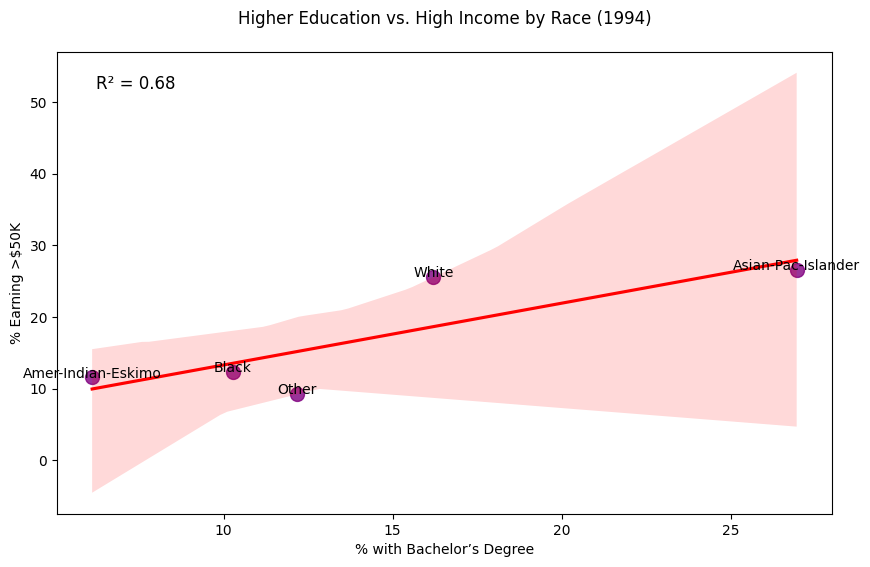

In [ ]:
# Calculate % with Bachelor's degree per race
education_race = df.groupby('race')['education'].apply(lambda x: (x == 'Bachelors').mean() * 100)

# Use merge to merge income data with bachelor's degree percentages from education
race_stats = pd.merge(
    education_race.rename('pct_bachelors'),
    # rename the '>50K' column to 'pct_high_income' so it is clear what it represents
    race_income_pct['>50K'].rename('pct_high_income'),
    left_index=True,
    right_index=True
)

# Prepare data
X = race_stats['pct_bachelors'].values.reshape(-1, 1)
y = race_stats['pct_high_income'].values

# Fit linear regression
reg = LinearRegression().fit(X, y)
r2 = reg.score(X, y)

# Plot with regression
# the regression line helps visualize the relationship between education and income
# since
plt.figure(figsize=(10, 6))
sns.regplot(
    data=race_stats, 
    x='pct_bachelors', 
    y='pct_high_income',
    scatter_kws={'s': 100, 'color': 'purple'},
    line_kws={'color': 'red'}
)
# add text labels by location
for race in race_stats.index:
    plt.text(race_stats.loc[race, 'pct_bachelors'], race_stats.loc[race, 'pct_high_income'], race, ha='center')
plt.title('Higher Education vs. High Income by Race (1994)', pad=20)
plt.xlabel('% with Bachelor’s Degree')
plt.ylabel('% Earning >$50K')
# Add R² value to the plot
plt.annotate(f'R² = {r2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black', ha='left', va='top')
plt.show()

The plot's x-axis shows the % of races with a Bachelor's degree and the y-axis the % of races earning > $50k. The regression shows the general trend between these two axises with an upwards trend. The pink area around it is the range of this relationship and where it might land. It shows higher education usually means having a higher income. The linear regression R^2 shows a 68% variation. This means it has a strong positive linear relationship between higher education and higher income
Yet again, we notice how there is distance of between the races in their income and education level. Although education plays a role in having higher income, other factors like discrimination, work oppertunities or social context could also explain the income differences between the races.

Looking specifically at the races "White" and "Black" we get a clear picture.

In [118]:
print(race_stats.loc[['Black', 'White']])

       pct_bachelors  pct_high_income
race                                 
Black      10.275288        12.387964
White      16.202905        25.585994


The print shows that having a bachelor's degree does not necessarily give the same income. 10% of black individuals have Bachelor's degrees compared to 16% white individuals. Only 12.5% black individuals earn above 50k compared to 25.7% white individuals who earn above 50k.

# Conclusion
To fully understand the data set, we have to understand the social, political and historical context of USA in 1994 and before it. Although being established as a melting pot of different nationalities, in the start 90s the states has had a long dark past of racial divide. Being black in America has roots in slavery, and being white benefited from this discrimination. Building on that foundation over time, it has historically shown a tendency where this discrimination has induced unfairness, and less choices from colored heritage. Being colored could face discimination not only in every day life, but also in the hiring process of a job.
When examining the dataset, deducing these imbalances becomes evident as, generally, lower income, lower education, and less income jobs are held in greater numbers by those of colored heritage. In turn, a lower educational level means lower amount of skill which is usually needed for higher paying jobs.

Likewise, historically and socially, women have usually been the ones caretaking for their children while the man of the house went to work. Although this trend seems to live on in 1994 America, contextually women were more prone to be stay at home moms (ref. 3). Looking at the genders in the dataset, the data shows how men hold higher paying occupations and higher paying jobs than women. Factors like these show the underlying complexities of society and how they shape reality.

The dataset shows living in USA in 1994 with a colored heritage is imbalanced compared to that of being Asian or White. Likewise, being a woman also has its constraints as discussed earlier. The data also indicates that being well educated gives a higher chance of having better income. And from this higher income, usually better at wealthy investment returns.



# References

(1): Hadley Wicham's tidy principles example https://github.com/hadley/tidy-data/blob/master/data/tb.r

(2): Pandas docs https://pandas.pydata.org/docs/

(3): More stay at home moms in 1994. https://eu.goupstate.com/story/news/2003/06/17/90s-brought-boom-in-stay-at-home-moms/29672470007/

(4): Being White statistically shows you have a higher income. https://www.epi.org/blog/real-median-household-incomes-racial-groups/

(5): Higher chance of higher education for the race "White" compared to the race "Black". https://www.bls.gov/news.release/history/hsgec_060195.txt

(6): Higher unemployment for the race "Black". https://www.bls.gov/opub/ted/2011/ted_20111005_data.htm

(7): Women earn less than men throughout US history. https://www.pay-equity.org/info-time.html